**Import Library**

In [1]:
import kagglehub
import shutil
import os
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


**Download dataset**

In [2]:
path = kagglehub.dataset_download("jeffheaton/iris-computer-vision")
print(f"Dataset downloaded to: {path}")

Dataset downloaded to: C:\Users\Shofian\.cache\kagglehub\datasets\jeffheaton\iris-computer-vision\versions\1


**Membuat kelas**

In [3]:
classes = ['iris-setosa', 'iris-versicolour', 'iris-virginica']

**Membuat folder train 70% dan folder val 30%**

In [4]:
for cl in classes:
  img_path = os.path.join(path, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.7)], images[round(len(images)*0.7):]

  for t in train:
    if not os.path.exists(os.path.join(path, 'train', cl)):
      os.makedirs(os.path.join(path, 'train', cl))
    shutil.move(t, os.path.join(path, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(path, 'val', cl)):
      os.makedirs(os.path.join(path, 'val', cl))
    shutil.move(v, os.path.join(path, 'val', cl))

iris-setosa: 0 Images
iris-versicolour: 0 Images
iris-virginica: 0 Images


**Membuat path menuju folder train dan val**

In [5]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')

**Menginisialisasi ukuran batch dan bentuk gambar**

In [100]:
batch_size = 18
img_shape = 150

**Function untuk memplot gambar**

In [101]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


**Gambar dibalik secara horizontal**

In [102]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_shape,img_shape)
)

Found 294 images belonging to 3 classes.


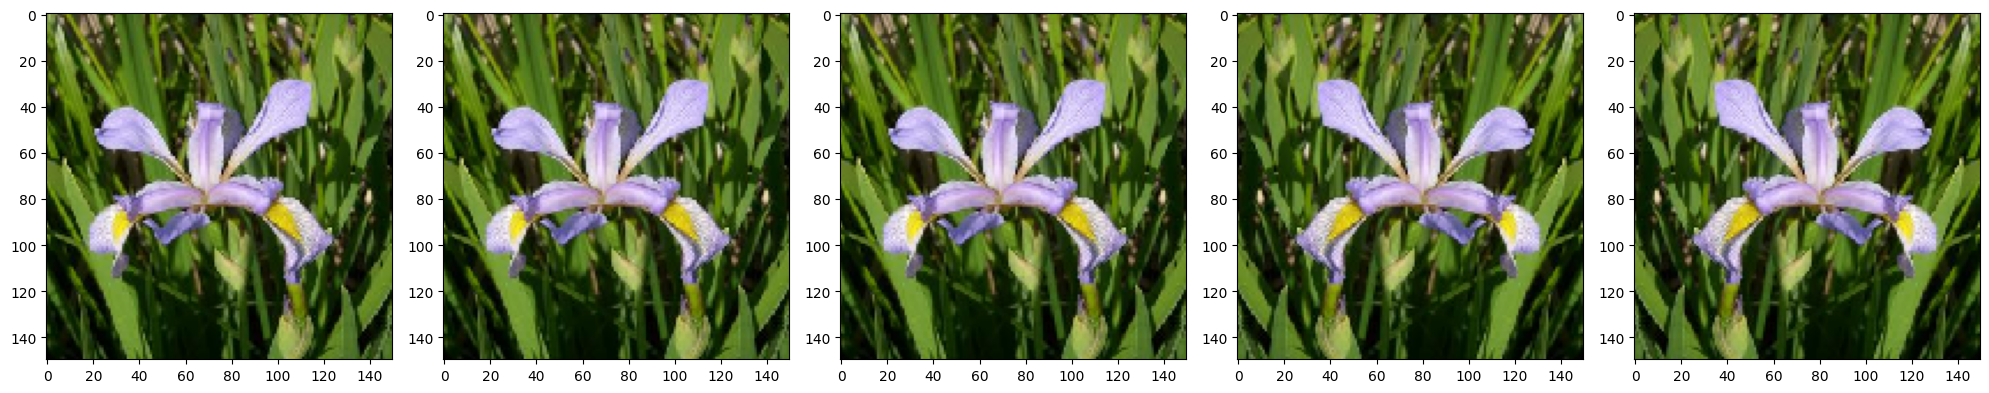

In [103]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Gambar dirotasi sebesar 45 derajat**

In [104]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_shape, img_shape)
)

Found 294 images belonging to 3 classes.


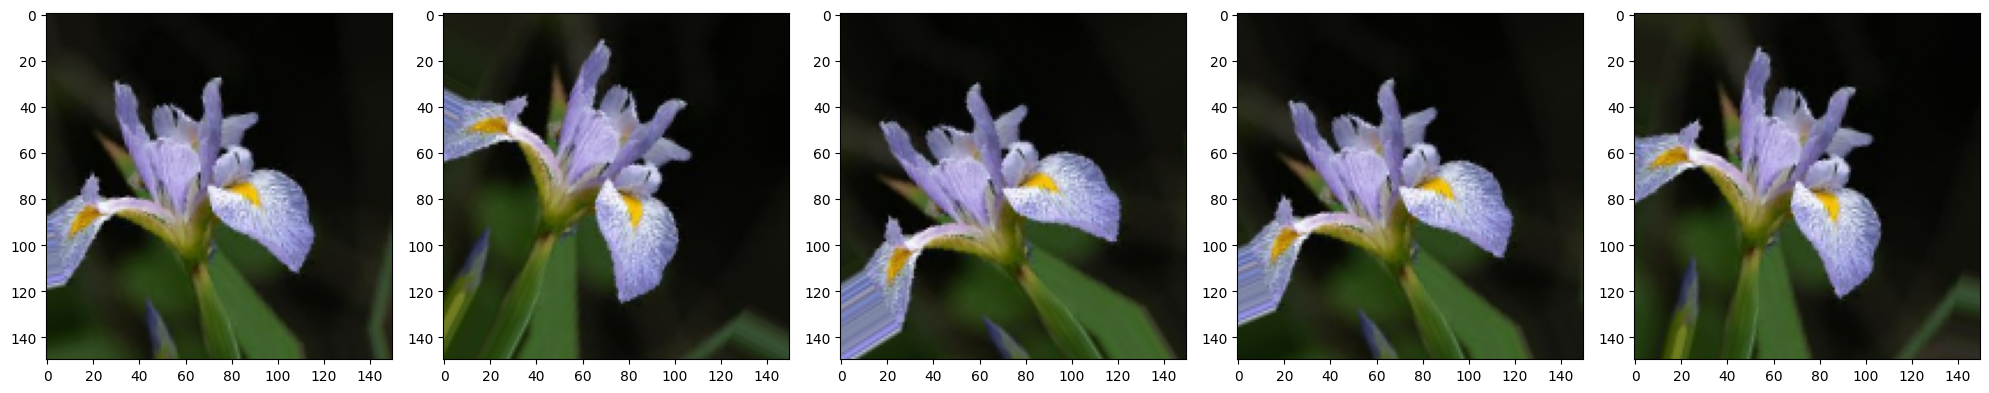

In [105]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Gambar dizoom sebesar 50%**

In [106]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_shape, img_shape)
)


Found 294 images belonging to 3 classes.


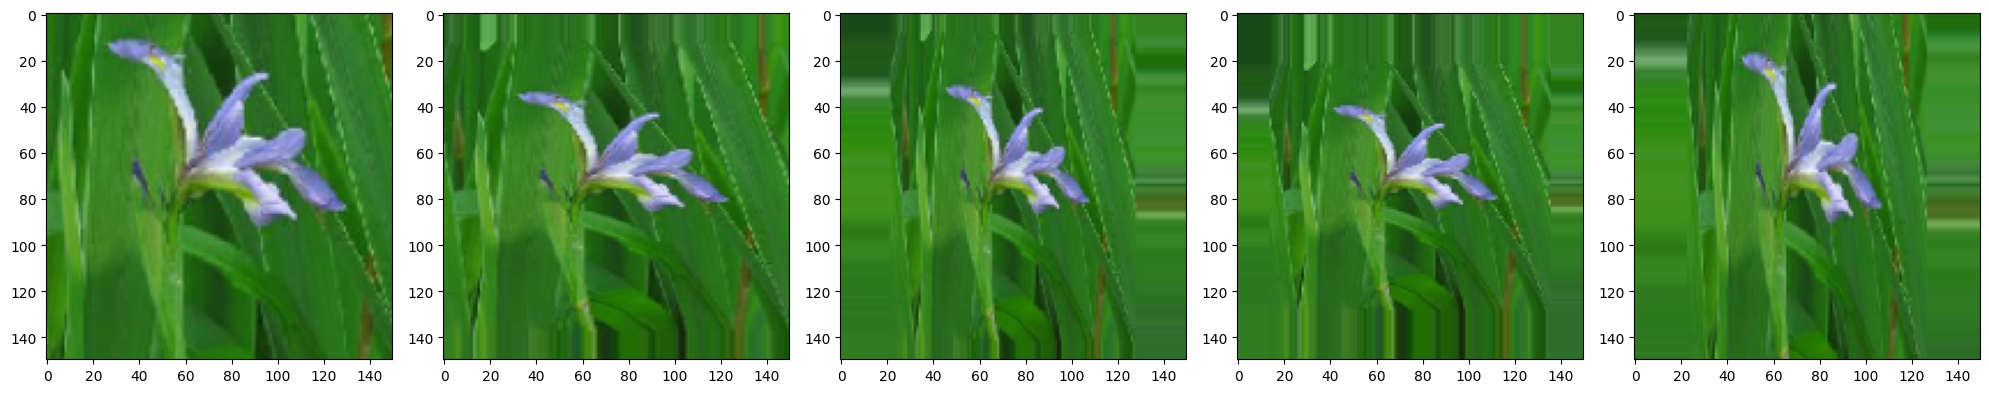

In [107]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Augmentasi data train**

In [108]:
image_gen_train = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.8, 1.2),
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_shape, img_shape),
    class_mode='binary'
)

Found 294 images belonging to 3 classes.


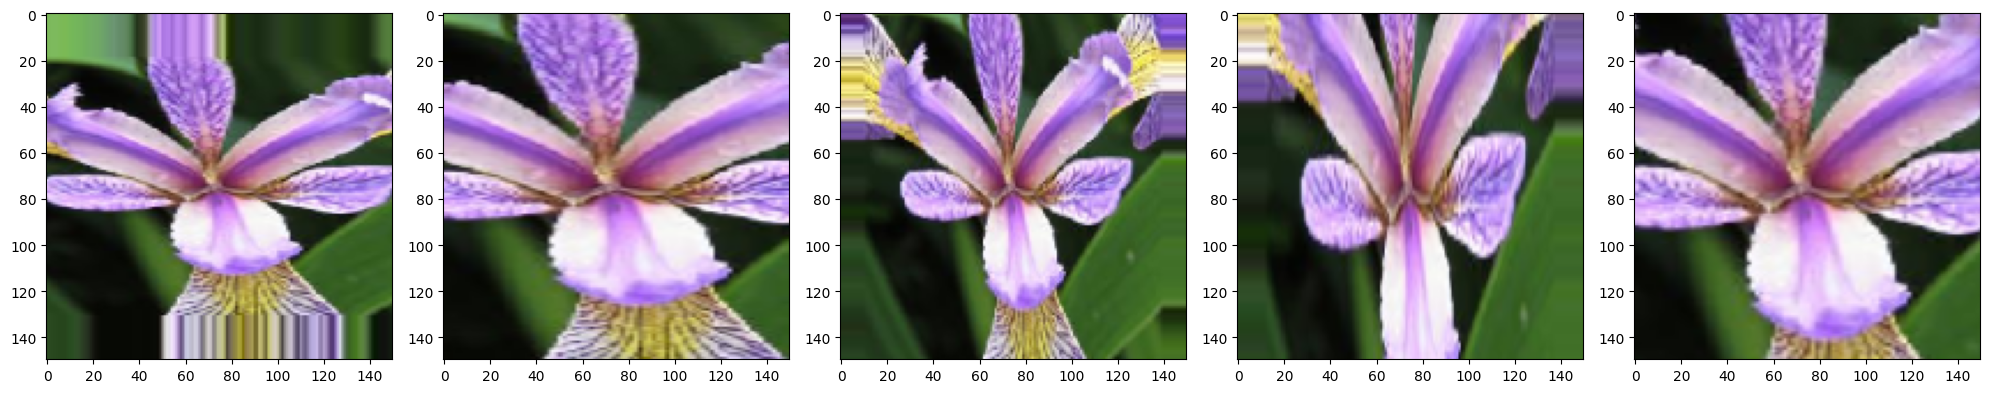

In [109]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

**Augmentasi data test**

In [110]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    target_size=(img_shape, img_shape),
    class_mode='sparse'
)

Found 127 images belonging to 3 classes.


**Membuat model neural network**

In [111]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

**Compiler model**

In [112]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [113]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,739 (40.58 MB)

 Trainable params: 10,636,739 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
total_train = 0
total_val = 0
for cl in classes:
    train_path = os.path.join(train_dir, cl)
    val_path = os.path.join(val_dir, cl)
    n_train = len(glob.glob(os.path.join(train_path, '*.jpg')))
    n_val = len(glob.glob(os.path.join(val_path, '*.jpg')))
    total_train += n_train
    total_val += n_val
print(f"Total train images: {total_train}")
print(f"Total val images: {total_val}")

Total train images: 294
Total val images: 127


**Melatih data train**

In [153]:
batch_size = 20
epochs=10
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.9380 - loss: 0.1638 - val_accuracy: 0.5556 - val_loss: 2.8985
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8889 - loss: 0.2387 - val_accuracy: 0.5714 - val_loss: 2.9258
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.9109 - loss: 0.1650 - val_accuracy: 0.5397 - val_loss: 2.8130
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9167 - loss: 0.1711 - val_accuracy: 0.5476 - val_loss: 2.7941
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.9380 - loss: 0.1526 - val_accuracy: 0.5000 - val_loss: 2.7757
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9722 - loss: 0.0901 - val_accuracy: 0.5079 - val_loss: 2.8002
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.9419 - loss: 0.1547 - val_accuracy: 0.5079 - val_loss: 2.8071
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9722 - loss: 0.0696 - val_accuracy: 0.5317

**Memplot akurasi dan kerugian**

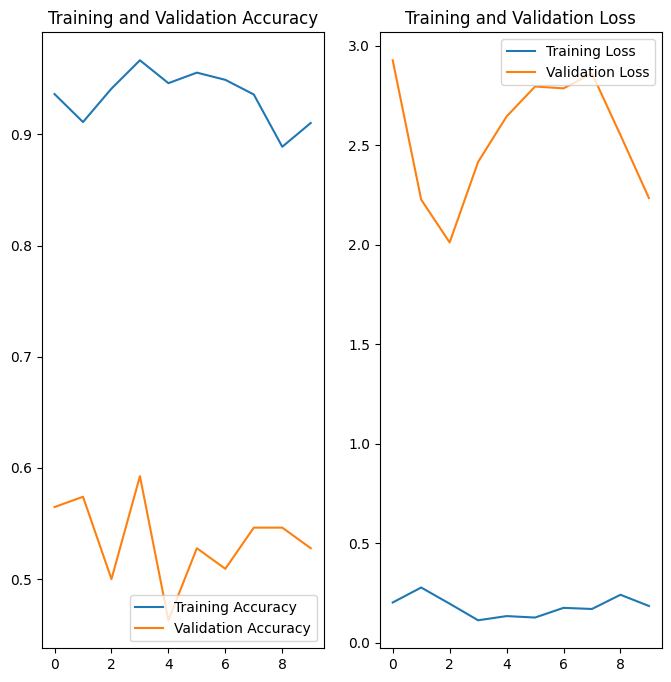

In [148]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Prediksi Iris Setosa**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Label prediksi: iris-setosa


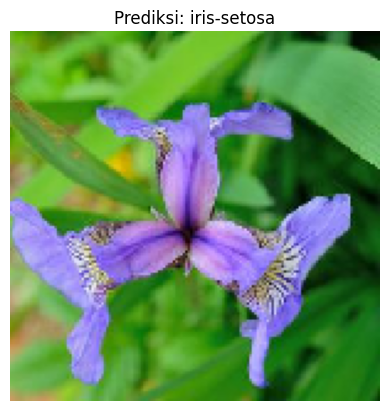

In [149]:
img_file = 'C:/Users/Shofian/.cache/kagglehub/datasets/jeffheaton/iris-computer-vision/versions/1/val/iris-setosa/setosa1.jpg'

img = image.load_img(img_file, target_size=(img_shape, img_shape))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0) 

pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
predicted_label = classes[predicted_class]

print(f"Label prediksi: {predicted_label}")

plt.imshow(img)
plt.title(f"Prediksi: {predicted_label}")
plt.axis('off')
plt.show()

**Prediksi Iris Virginica**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Label prediksi: iris-virginica


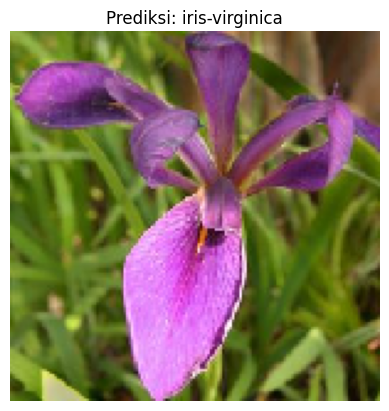

In [150]:
img_file = 'C:/Users/Shofian/.cache/kagglehub/datasets/jeffheaton/iris-computer-vision/versions/1/val/iris-virginica/virginica1.jpg'

img = image.load_img(img_file, target_size=(img_shape, img_shape))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0) 

pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
predicted_label = classes[predicted_class]

print(f"Label prediksi: {predicted_label}")

plt.imshow(img)
plt.title(f"Prediksi: {predicted_label}")
plt.axis('off')
plt.show()

**Prediksi Iris Versicolour**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Label prediksi: iris-versicolour


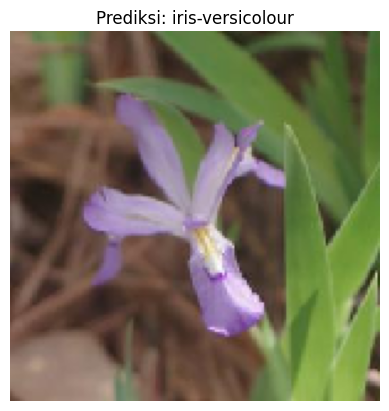

In [151]:
img_file = 'C:/Users/Shofian/.cache/kagglehub/datasets/jeffheaton/iris-computer-vision/versions/1/val/iris-versicolour/versicolour5.jpg'

img = image.load_img(img_file, target_size=(img_shape, img_shape))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  
img_array = np.expand_dims(img_array, axis=0) 

pred = model.predict(img_array)
predicted_class = np.argmax(pred, axis=1)[0]
predicted_label = classes[predicted_class]

print(f"Label prediksi: {predicted_label}")

plt.imshow(img)
plt.title(f"Prediksi: {predicted_label}")
plt.axis('off')
plt.show()